In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from pmdarima.arima.utils import ndiffs, nsdiffs
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('processed_dataframe.csv', index_col='DATE', parse_dates=True)
df.head()

,Alkoholunfälle,Fluchtunfälle,Verkehrsunfälle
DATE,,,
2000-01-01,78.0,835.0,3448.0
2000-02-01,53.0,890.0,3181.0
2000-03-01,73.0,974.0,3783.0
2000-04-01,78.0,834.0,3317.0
2000-05-01,96.0,1086.0,4123.0


In [4]:
Alkohol_df = df[['Alkoholunfälle']]
Flucht_df = df[['Fluchtunfälle']]
Verkehrs_df = df[['Verkehrsunfälle']]
dataframes = {'Alkoholunfälle': Alkohol_df, 'Fluchtunfälle': Flucht_df, 'Verkehrsunfälle': Verkehrs_df}

In [5]:
ndiff_estimated = {category:[] for category in dataframes.keys()}
for category, dataframe in dataframes.items():
    ndiff_estimated[category].append(ndiffs(dataframe, max_d=4))
    ndiff_estimated[category].append(nsdiffs(dataframe, max_D=4, m=12))

In [6]:
for key, value in ndiff_estimated.items():
    print('Category: {}\nd value: {}\nD value: {}\n'.format(key, value[0], value[1]))

Category: Alkoholunfälle
d value: 1
D value: 0

Category: Fluchtunfälle
d value: 1
D value: 0

Category: Verkehrsunfälle
d value: 1
D value: 0



In [7]:
orders_estimated = {category:[] for category in dataframes.keys()}
for category, dataframe in dataframes.items():
    print('Estimating orders for: {}\n'.format(category))
    model = auto_arima(dataframe, seasonal=True, d=ndiff_estimated[category][0],
                          D=ndiff_estimated[category][1], m=12, max_p=5, max_q=5, max_P=5, max_Q=5,
                          trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
    print('-'*80)
    orders_estimated[category].append(model.order)
    orders_estimated[category].append(model.seasonal_order)

Estimating orders for: Alkoholunfälle

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1808.066, Time=1.89 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1997.543, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1907.150, Time=0.25 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1907.767, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1995.645, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=1.47 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=1852.066, Time=0.92 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=1809.762, Time=3.69 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=1809.694, Time=3.43 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1927.066, Time=0.63 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=1865.613, Time=1.36 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=1826.206, Time=1.58 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=1811.779, Time=3.83 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=1805.988,

 ARIMA(4,1,0)(1,0,1)[12] intercept   : AIC=3552.075, Time=1.90 sec
 ARIMA(3,1,1)(1,0,1)[12] intercept   : AIC=3574.484, Time=1.56 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.67 sec
 ARIMA(4,1,1)(1,0,1)[12] intercept   : AIC=3598.375, Time=2.08 sec
 ARIMA(3,1,0)(1,0,1)[12]             : AIC=inf, Time=1.33 sec

Best model:  ARIMA(3,1,0)(1,0,1)[12] intercept
Total fit time: 60.411 seconds
--------------------------------------------------------------------------------


In [8]:
for key, value in orders_estimated.items():
    print('Category: {}\nARIMA orders: {}\nSARIMA orders: {}\n'.format(key, value[0], value[1]))

Category: Alkoholunfälle
ARIMA orders: (0, 1, 2)
SARIMA orders: (1, 0, 1, 12)

Category: Fluchtunfälle
ARIMA orders: (0, 1, 2)
SARIMA orders: (0, 0, 5, 12)

Category: Verkehrsunfälle
ARIMA orders: (3, 1, 0)
SARIMA orders: (1, 0, 1, 12)



C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Root Mean Squared Error for Alkoholunfälle is:  9.385587901399624


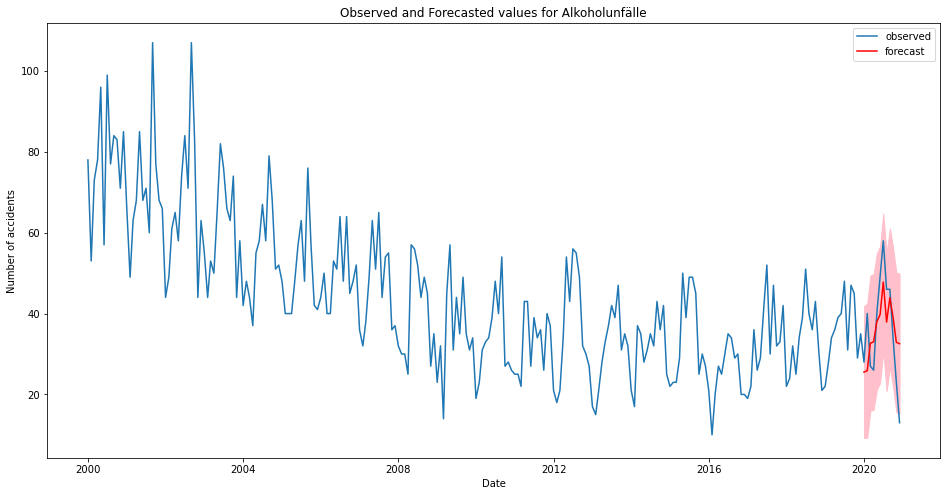

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Root Mean Squared Error for Fluchtunfälle is:  180.70433404802668


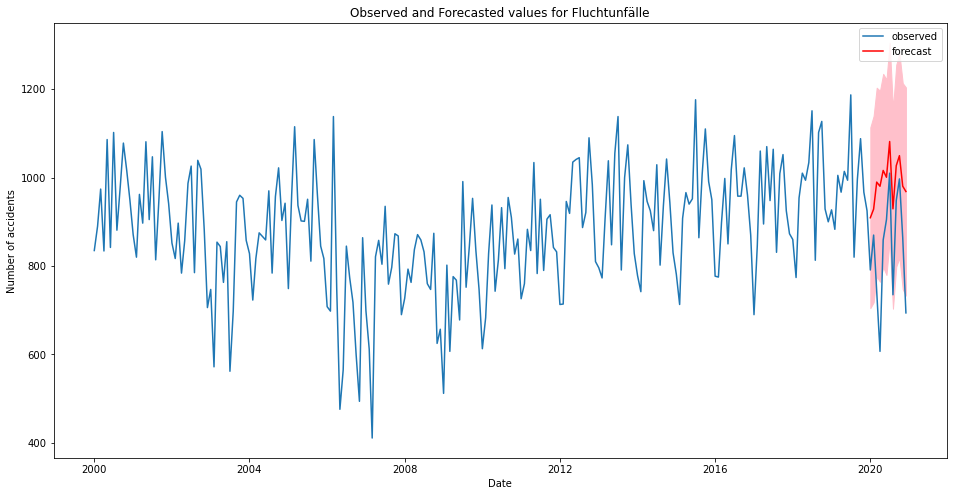

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Root Mean Squared Error for Verkehrsunfälle is:  640.6285585812593


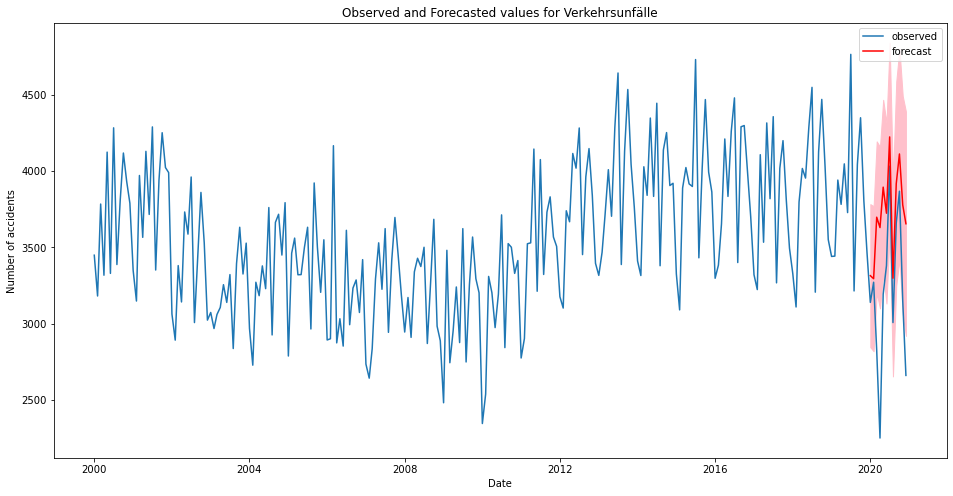

In [9]:
for category, dataframe in dataframes.items():
    model = SARIMAX(dataframe[:'2019'], order=orders_estimated[category][0],
                    seasonal_order=orders_estimated[category][1])
    results = model.fit()
    forecast = results.get_forecast(steps=12)
    mean_forecast = forecast.predicted_mean
    confidence_intervals = forecast.conf_int()
    lower_limits = confidence_intervals.iloc[:,0]
    upper_limits = confidence_intervals.iloc[:,1]
    print('Root Mean Squared Error for {} is: '.format(category),
          np.sqrt(mean_squared_error(dataframe.loc['2020':], mean_forecast)))
    #plotting the forecasted values, along with the observed values
    fig, ax = plt.subplots(figsize=(16,8))
    ax.plot(dataframe.index, dataframe[category], label='observed')
    ax.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')
    ax.fill_between(mean_forecast.index, lower_limits, upper_limits, color='pink')
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of accidents')
    ax.set_title('Observed and Forecasted values for {}'.format(category))
    ax.legend()
    plt.show()